# Word Clouds with Masking Images

In [1]:
from rembg import remove 
from PIL import Image

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import numpy as np

## Images

``ONCE YOU HAVE A GOOD SILHOUETTE, SET BELOW TO FALSE TO AVOID OVERWRITING``

In [2]:
ImagesNotProcessed = False 

### Internet Images

In [3]:
if ImagesNotProcessed:
    from simple_image_download import simple_image_download as simp 
    response = simp.Downloader()
    keyword = "kangaroo"
    try:
        response.download(keyword, 12)
        print("Images downloaded successfully.")
    except Exception as e:
        print("An error occurred:", e)

``LOOK THROUGH /simple_images/ FOR A GOOD PICTURE.``\
``TAKE A SCREENSHOT OF THE CROPPED IMAGE YOU WANT.``\
``SAVE THAT FILE AS assets/<object name>.png``

### Strip Background

In [4]:
if ImagesNotProcessed:
    input_img = 'assets/kanga.png'
    output_img = 'assets/kanga_out.png'

    inp = Image.open(input_img)
    output = remove(inp)

    output.save(output_img)

### Silhouette

In [5]:
if ImagesNotProcessed:
    im = Image.open('assets/kanga_out.png')
    
    # Extract the alpha channel and threshold it at 200
    alpha = im.getchannel('A')
    alphaThresh = alpha.point(lambda p: 255 if p>200 else 0)
    
    # Make a new completely black image same size as original 
    res = Image.new('RGB', im.size)
    
    # Copy across the alpha channel from original
    res.putalpha(alphaThresh)
    res.save('assets/kanga_sil.png')

``YOU MAY RUN INTO PROBLEMS IF THIS FILE IS TOO BIG.``\
``IF SO, TAKE A SCREENSHOT OF IT AND OVERWRITE THE SIL FILE. ``

## Text

``https://en.wikipedia.org/wiki/Kangaroo``\
``COPY ALL TEXT AND SAVE TO assets/<object_name>.txt``\
``RESOLVE ERRORS ON OPEN BY REMOVING PROBLEM TEXT``

In [6]:
data = open("assets/kangaroo.txt", "r").read()

## Word Cloud

In [7]:
stopwords = set(STOPWORDS)
stop_list = ['male', 
             'males', 
             'female', 
             'Australian']
for word in stop_list:
    STOPWORDS.add(word)
    STOPWORDS.add(' '+word)
    STOPWORDS.add(word+' ')
    STOPWORDS.add('  '+word)
    STOPWORDS.add(word+'  ')    

In [8]:
kanga_wc = WordCloud()
kanga_wc.generate(data)

In [9]:
kanga_mask = np.array(Image.open('assets/kanga_sil.png'))

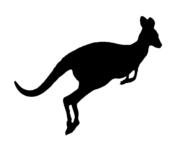

In [10]:
fig = plt.figure(figsize=(2,3))
plt.imshow(kanga_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

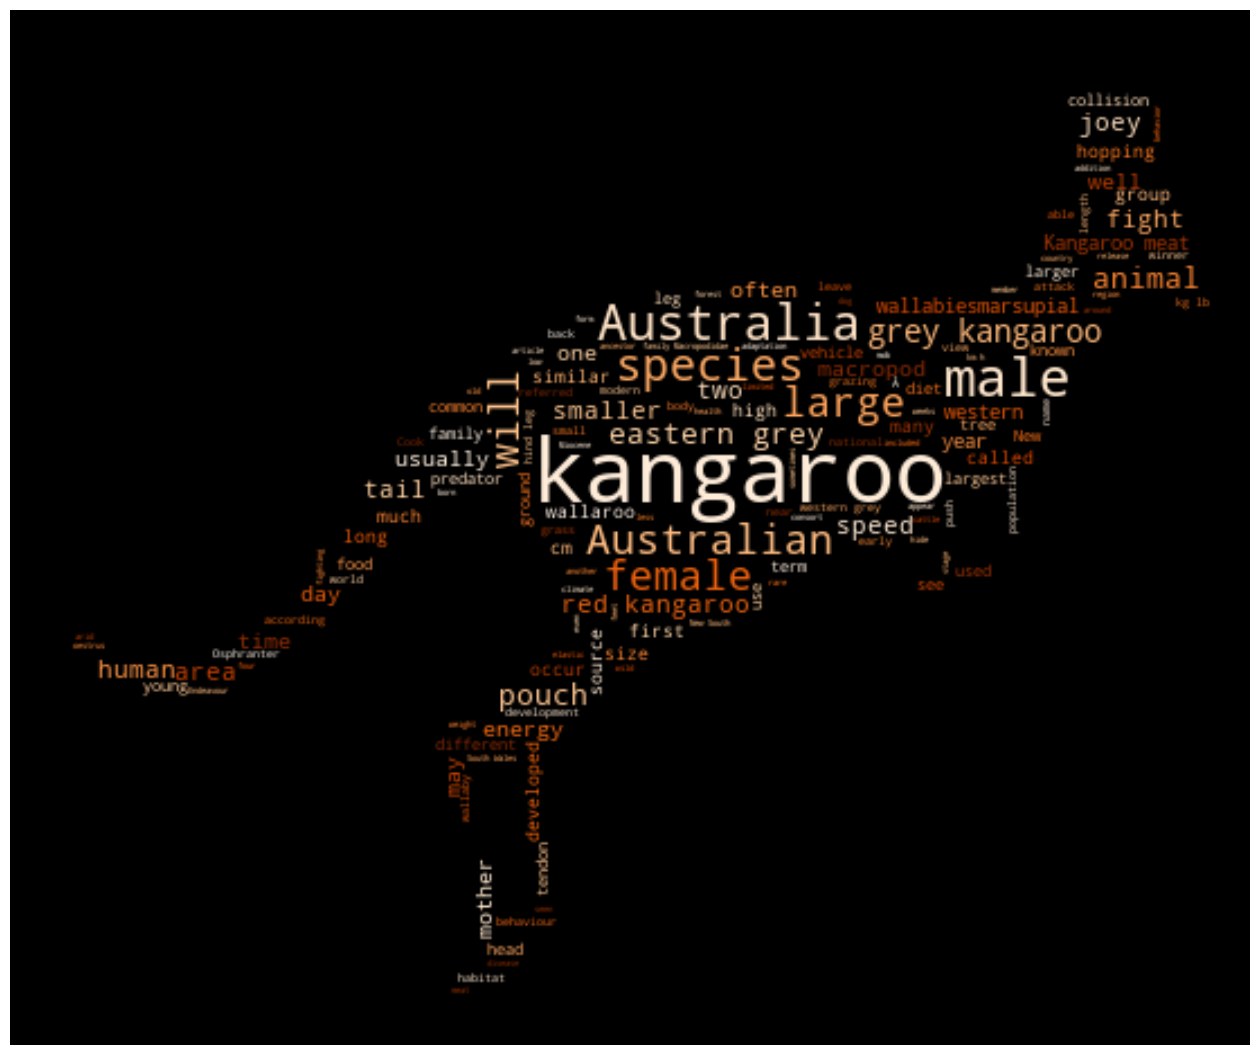

In [11]:
kanga_wc = WordCloud(background_color='black', max_words=5000, mask=kanga_mask, colormap = "Oranges", stopwords=stopwords)
kanga_wc.generate(data)
fig = plt.figure(figsize=(16,16))
plt.imshow(kanga_wc, interpolation='bilinear')
plt.axis('off')
plt.show()